# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn

2024-10-17 13:49:39.408774: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?

   Used set_random_seed and op determinism. See cell below.

   - Visualize the network's architecture and decision boundary.

   Done. See below. My PC couldnt import the plot_model method...

   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   
   I chose the SGD optimizer because it was the one I learned and understood at the time. When I tried with the Adam optimizer it didnt change much. This may be because of a small or predictive dataset.  We can see on the decition boundary on the adam looks more sinsitive.
   
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
The learning rate did not improve the preforamnce. This may be because the data was not complex enough or just too small to notice any difference.

   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.

   We can see that the SGD's boundary looks more correct at first. But we can see that there are some anomalies in the data, which Adam was more sensitive to.


In [2]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model, set_random_seed
from torchviz import make_dot
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.config.experimental import enable_op_determinism

import pydot

import graphviz



In [3]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train = train.drop(columns='split')
test = test.drop(columns='split')


X_train = train.drop(columns=['y'])
y_train = train['y']

X_test = test.drop(columns=['y'])
y_test = test['y']

set_random_seed(1)
enable_op_determinism()

In [4]:
modelSGD = tf.keras.models.Sequential()
modelSGD.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
modelSGD.add(Dense(2, activation='relu'))
modelSGD.add(Dense(1, activation='sigmoid'))

initial_lr = 0.1
modelSGD.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()],
              )

modelSGDNoCallback = tf.keras.models.Sequential()
modelSGDNoCallback.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
modelSGDNoCallback.add(Dense(2, activation='relu'))
modelSGDNoCallback.add(Dense(1, activation='sigmoid'))

initial_lr = 0.1
modelSGDNoCallback.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()],
              )



modelAdamNoCallback = tf.keras.models.Sequential()
modelAdamNoCallback.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
modelAdamNoCallback.add(Dense(2, activation='relu'))
modelAdamNoCallback.add(Dense(1, activation='sigmoid'))

modelAdamNoCallback.compile(optimizer="Adam", 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=[keras.metrics.BinaryAccuracy()])


modelAdam = tf.keras.models.Sequential()
modelAdam.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
modelAdam.add(Dense(2, activation='relu'))
modelAdam.add(Dense(1, activation='sigmoid'))

modelAdam.compile(optimizer="Adam", 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=[keras.metrics.BinaryAccuracy()])

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
def lr_scheduler(epoch, lr, epochs):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return initial_lr * (epoch + 1) / warmup_epochs
    else:
        cosine_decay = 0.5 * (1 + np.cos(np.pi * (epoch - warmup_epochs) / (epochs - warmup_epochs)))
        return initial_lr * cosine_decay

epochs = 100

lr_schedule_callback = LearningRateScheduler(lambda epoch, lr: lr_scheduler(epoch, lr, epochs))

In [7]:
epochs = 100
historySGD = modelSGD.fit(X_train, y_train, 
                    epochs=epochs, 
                    #batch_size=32, 
                    #validation_split=0.2, 
                    verbose=1,
                    callbacks=[lr_schedule_callback],
                    )

historySGDNoCallback = modelSGDNoCallback.fit(X_train, y_train, 
                    epochs=epochs, 
                    #batch_size=32, 
                    #validation_split=0.2, 
                    verbose=1,
                    )



y_predSGD = (modelSGD.predict(X_test) >= 0.5).astype("int32")

y_predSGDNoCallback = (modelSGD.predict(X_test) >= 0.5).astype("int32")


from sklearn.metrics import accuracy_score

accuracySGD = accuracy_score(y_test, y_predSGD)
accuracySGDNoCallback = accuracy_score(y_test, y_predSGDNoCallback)


print(f"Test Accuracy SGD: {accuracySGD}")
print(f"Test Accuracy SGD no callback: {accuracySGDNoCallback}")


modelSGD.summary()


modelSGDNoCallback.summary()


historyAdam = modelAdam.fit(X_train, y_train, 
                    epochs=epochs, 
                    #batch_size=32, 
                    #validation_split=0.2, 
                    verbose=1,
                    callbacks=[lr_schedule_callback],
                    )

historyAdamNoCallback = modelAdamNoCallback.fit(X_train, y_train, 
                    epochs=epochs, 
                    #batch_size=32, 
                    #validation_split=0.2, 
                    verbose=1,
                    )



y_predAdam = (modelAdam.predict(X_test) >= 0.5).astype("int32")

y_predAdamNoCallback = (modelAdamNoCallback.predict(X_test) >= 0.5).astype("int32")

from sklearn.metrics import accuracy_score

accuracyAdam = accuracy_score(y_test, y_predAdam)
accuracyAdamNoCallback = accuracy_score(y_test, y_predAdamNoCallback)
print(f"Test Accuracy Adam: {accuracyAdam}")
print(f"Test Accuracy Adam No Callback: {accuracyAdamNoCallback}")

modelAdam.summary()


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9476 - loss: 0.2875 - learning_rate: 0.0200
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9455 - loss: 0.2891 - learning_rate: 0.0400
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9423 - loss: 0.2916 - learning_rate: 0.0600
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9405 - loss: 0.2938 - learning_rate: 0.0800
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9377 - loss: 0.2966 - learning_rate: 0.1000
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9361 - loss: 0.2968 - learning_rate: 0.1000
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9389 - loss: 0.2968 - learning_rate: 0.1000
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9366 - loss: 0.2961 - learning_rate: 0.0999
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47 (192.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47 (192.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.5075 - loss: 0.6980 - learning_rate: 0.0200
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6359 - loss: 0.6669 - learning_rate: 0.0400
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8098 - loss: 0.5758 - learning_rate: 0.0600
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8466 - loss: 0.4359 - learning_rate: 0.0800
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8577 - loss: 0.4006 - learning_rate: 0.1000
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8201 - loss: 0.4213 - learning_rate: 0.1000
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8546 - loss: 0.4127 - learning_rate: 0.1000
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8817 - loss: 0.3687 - learning_rate: 0.0999
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (552.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92 (372.00 B)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


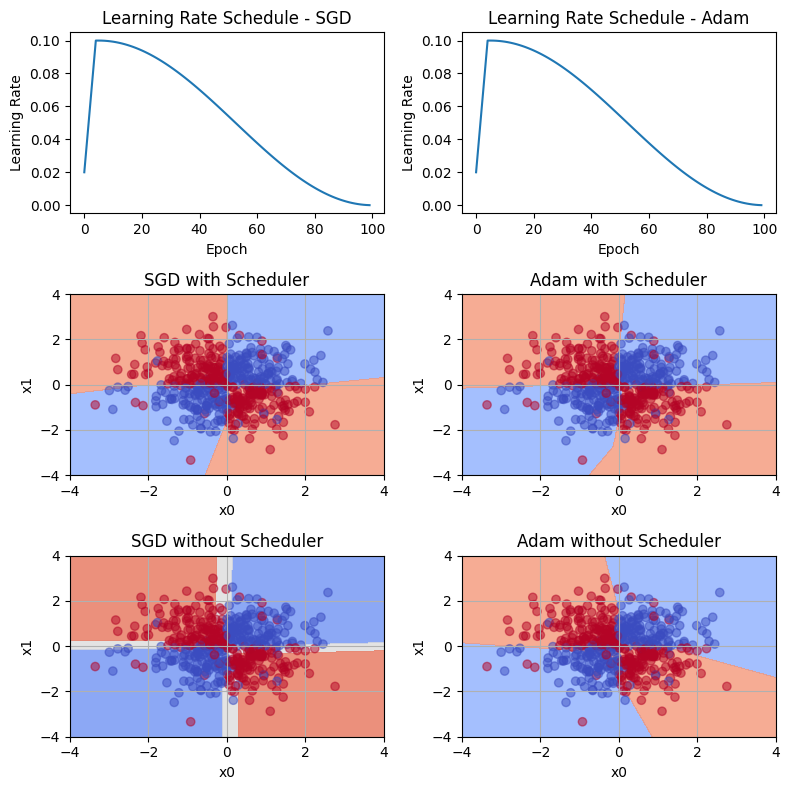

In [26]:
np.random.seed(567)
tf.random.set_seed(567)

epochs = 100

lrs_SGD = [lr_scheduler(i, initial_lr, epochs=100) for i in range(epochs)]
lrs_Adam = [lr_scheduler(i, initial_lr, epochs=100) for i in range(epochs)]

# Generate mesh grid for decision boundary
x0 = np.linspace(-4, 4, 200)
x1 = np.linspace(-4, 4, 200)
X0, X1 = np.meshgrid(x0, x1)
X = np.vstack([X0.ravel(), X1.ravel()]).T

# Creating subplots (2x2)
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

# Plotting learning rate schedule for SGD
axes[0, 0].plot(lrs_SGD)
axes[0, 0].set_title('Learning Rate Schedule - SGD')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Learning Rate')

# Plotting learning rate schedule for Adam
axes[0, 1].plot(lrs_Adam)
axes[0, 1].set_title('Learning Rate Schedule - Adam')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Learning Rate')

# Assuming train is your dataset with columns x0, x1, and y

# Plot decision boundary for SGD (with scheduler)
y_SGD = modelSGD.predict(X).reshape(200, 200)
axes[1, 0].contourf(X0, X1, y_SGD, cmap='coolwarm', alpha=0.8, levels=1)
axes[1, 0].scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm', alpha=0.5)
axes[1, 0].grid(True)
axes[1, 0].set_xlabel('x0')
axes[1, 0].set_ylabel('x1')
axes[1, 0].set_title('SGD with Scheduler')

# Plot decision boundary for Adam (with scheduler)
y_Adam = modelAdam.predict(X).reshape(200, 200)
axes[1, 1].contourf(X0, X1, y_Adam, cmap='coolwarm', alpha=0.8, levels=1)
axes[1, 1].scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm', alpha=0.5)
axes[1, 1].grid(True)
axes[1, 1].set_xlabel('x0')
axes[1, 1].set_ylabel('x1')
axes[1, 1].set_title('Adam with Scheduler')

y_SGD = modelSGDNoCallback.predict(X).reshape(200, 200)
axes[2, 0].contourf(X0, X1, y_SGD, cmap='coolwarm', alpha=0.8, levels=1)
axes[2, 0].scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm', alpha=0.5)
axes[2, 0].grid(True)
axes[2, 0].set_xlabel('x0')
axes[2, 0].set_ylabel('x1')
axes[2, 0].set_title('SGD without Scheduler')

# Plot decision boundary for Adam (with scheduler)
y_Adam = modelAdamNoCallback.predict(X).reshape(200, 200)
axes[2, 1].contourf(X0, X1, y_Adam, cmap='coolwarm', alpha=0.8, levels=1)
axes[2, 1].scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm', alpha=0.5)
axes[2, 1].grid(True)
axes[2, 1].set_xlabel('x0')
axes[2, 1].set_ylabel('x1')
axes[2, 1].set_title('Adam without Scheduler')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

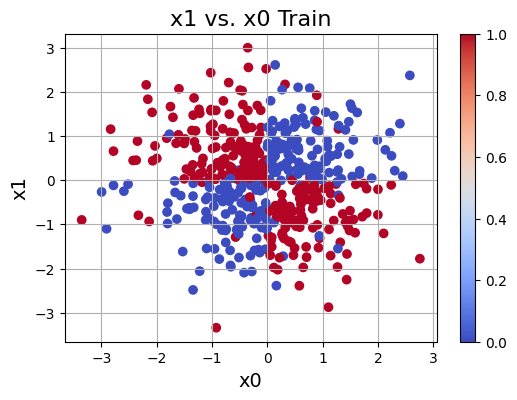

In [145]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0 Train', fontsize=16)
plt.colorbar()

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

   I used t-SNE to reduce the dataset to 3 dimensions. This method was effective because t-SNE is known for preserving the local structure of the data, which makes it ideal for visualizing complex, non-linear structures in the data. When clusters are elongated or irregularly shaped, t-SNE can provide a clearer separation between groups compared to methods like PCA. UMAP might work better in some cases depending on the data structure, but since my clusters were long and irregular, t-SNE provided a better separation

   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.

I used DBSCAN (Density-Based Spatial Clustering of Applications with Noise). This choice makes sense since DBSCAN is effective at finding arbitrarily shaped clusters, especially when clusters aren’t around a central point (centroid) like in KMeans. KMeans assumes that clusters are spherical and of equal size. It works well for datasets where clusters are clearly defined around centroids, but struggles with complex shapes or noise.
DBSCAN, on the other hand, identifies clusters based on density and does not assume any specific shape. It’s robust to noise and can handle clusters of varying shapes and sizes. However, it may be sensitive to the choice of eps and min_samples.

   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.

By reshaping the data into 128x128 grids and using imshow(), I effectively visualized geographical data as images, which helped me identify server locations in Trondheim based on maps printed out. The locations were: Samfundet, Ikea, T spectrum and the Pier-bath.

   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?

Certain algorithms like t-SNE and UMAP are better at capturing non-linear structures, which can arise from complex data types like images or text. If the clusters are not linearly separable (which is common with hidden data types), PCA may struggle, while t-SNE or UMAP could capture the subtle variations better.

   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [12]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column

data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

/usr/local/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


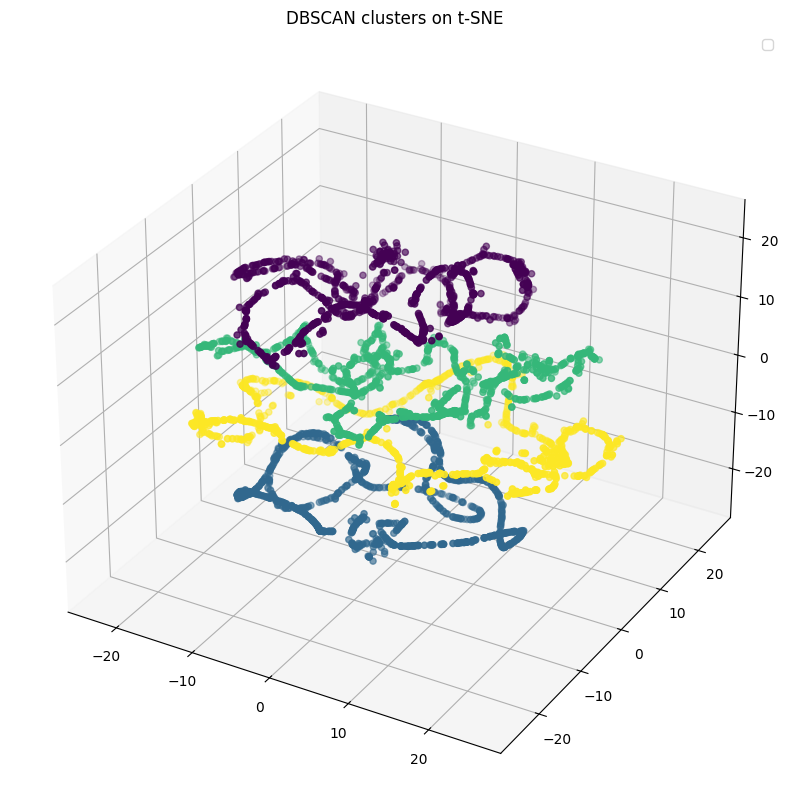

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split

#data

#data.columns = data.iloc[0]
#data = data.drop(0)
#data.columns = [str(col).replace("col_", "") for col in data.columns]
#data = data.loc[:, sorted(data.columns, key=lambda x: int(x) if x.isdigit() else x)]
#data = data.reset_index(drop=False, inplace=True)
#data.rename(columns={'index': 'ID'}, inplace=True)
#data = data.reset_index(drop=True)


data

# We can observe that the number of colimns are 128^2 = 16 384
# We can also sort the columns to fit the correct col_xx to the column number


tsne = TSNE(n_components=3, perplexity=22,random_state=40)
data_tsne = tsne.fit_transform(data.iloc[:,2:])

# The data seems to have some clusters. Let's apply DbScan to find the clusters
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=10)
y_pred = dbscan.fit(data_tsne)
labels = dbscan.labels_



# Plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:,2], c = labels)
plt.title('DBSCAN clusters on t-SNE')
plt.legend()
plt.show()


pred_df = pd.DataFrame(data=np.array([labels]).T, columns=["cluster"])

pred_df.to_csv("submission.csv")

# Må legge inn ID manuelt


In [14]:
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

In [15]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 


In [16]:
# plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
# plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
# plt.legend()

In [17]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
submission = pd.read_csv('submission.csv')
submission

,Unnamed: 0,cluster
0,0,0
1,1,1
2,2,0
3,3,1
4,4,2
...,...,...
3995,3995,3
3996,3996,3
3997,3997,0
3998,3998,1


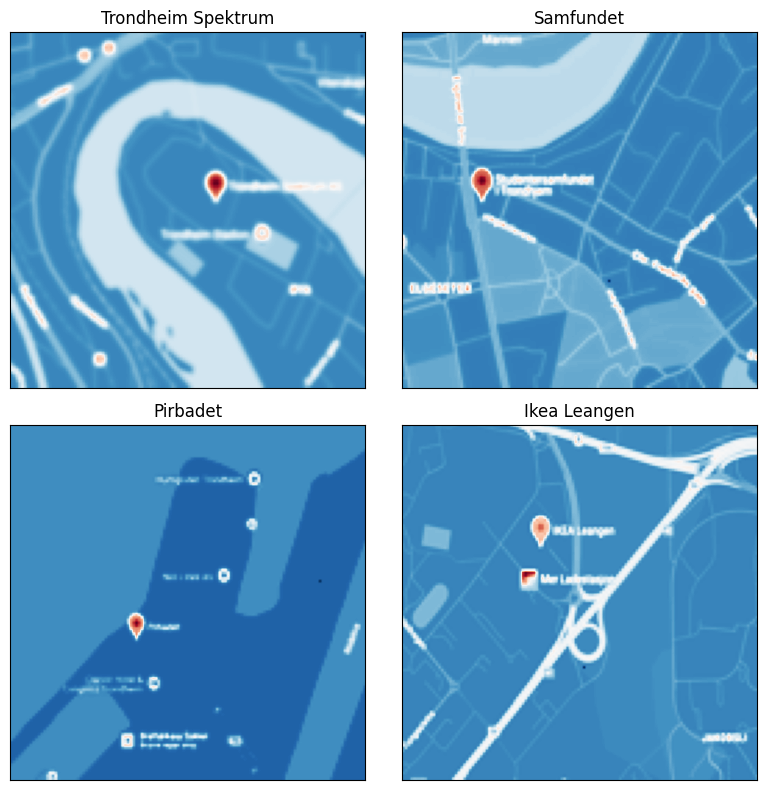

In [31]:
# To find out where the servers are
with open("unsupervised_data.csv") as f:
    l = f.readline().split(',')
    
np_line = np.array([int(col[4:]) for col in l])
line = np_line.reshape(128,128)


s = np.argsort(np_line)
reshape = data.drop(columns='ID').to_numpy()
reshape = reshape[:, s].reshape(-1, 128, 128)

pictures = {5: "Trondheim Spektrum", 
            24: "Samfundet",
            41: "Pirbadet",
            42: "Ikea Leangen"
            }

fig, ax = plt.subplots(2,2, figsize=(8,8))
ax = ax.ravel()

i = 0
for id, label in pictures.items():
    ax[i].imshow(reshape[id], cmap="RdBu", label=label)
    ax[i].grid(False)
    ax[i].set_title(label)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    #ax[i].legend()
    i += 1
    
plt.tight_layout()
plt.show()
    
    



---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [372]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [373]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [374]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [375]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5